In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from time import sleep
from tqdm import tqdm
import re
import json
import time

Part 1 - API requests - 15 points 
In this part, you are expected to obtain a dataset from an API. There might be some obstacles. 
You need to complete the dataset and use it in part 2. If you do not manage it, you can obtain 
the dataset anyway, but you forfeit the points for this part. You might obtain some partial 
points if you do not complete the section. 
API address: https://ies-midterm.soulution.rocks/
• if you receive an error, read the message! you might obtain an informative message
• if you see {"message":"Missing Authentication Token"}, then you are using a wrong 
request method on the endpoint. i.e. /login needs a POST, if you send a GET, you will 
see this.

In [2]:
payload = '{"cuni":"85675870"}'
r = requests.post('https://ies-midterm.soulution.rocks',payload)

In [3]:
r

<Response [403]>

In [4]:
payload = '{"cuni":"85675870"}'
r = requests.post('https://ies-midterm.soulution.rocks/login',payload)

In [5]:
r

<Response [200]>

In [6]:
d = json.loads(r.text)

In [7]:
d['data']['personal_code']

'c24c4769'

In [8]:
codes = d['data']['dataset_ids'][0]

In [9]:
codes

'f894683be9'

In [ ]:
collector = {}
n_attempts = 10
for data_id in codes:
    r = requests.get(url=f'https://ies-midterm.soulution.rocks/data/{data_id}')
    i = 0
    while r.status_code !=200:  
        r=requests.get(url=f'https://ies-midterm.soulution.rocks/data/{data_id}')
        time.sleep(1)
    d=r.json()['data']
    
    ticker = d['company']
    data = pd.DataFrame(d['data']).set_index('Date')
    data.index = pd.to_datetime(data.index)
    
    collector[ticker] = data
df = pd.concat(collector)
df.index.names = ['Ticker','Date']


In [ ]:
df

Unfortunately I still have a problem with data.



Analysis of your dataset - find the following quantities per company: 
- the time series should be from 2019-01-02 to 2020-11-20. Is it the case in your sample? 
- what is the highest and lowest Adj Close price the company recorded? 
- what day was the highest number of shares traded 
- what is the total of shares traded 
- for the company with the highest volume of shares traded over the whole period, plot 
their share price over time 
- when did the company record the highest gain and highest loss for the day? (logarithmic 
loss) 
- plot the log returns for the company that has the largest difference between opening and 
closing price. What day and what company did it occur at? 
- find monthly returns. Which company has the highest recorded? 
- for stocks with full time series, calculate 10day volatility by calculating the standard 
deviation of the previous 10 days. (i.e. 10th day is the first observation and it includes 
given day)
- create a single object with Adjusted Close prices, plot them together in one time series 
plot

Creating my own dataset.

In [50]:
df = pd.DataFrame({"Time": ["2019-05-31", "2019-06-30", "2019-07-31"], "Adj Close": [3, 2, 1], "Shares traded": [22000,30000,50000], "Share price": [2,4,6]})


In [51]:
df

,Time,Adj Close,Shares traded,Share price
0,2019-05-31,3,22000,2
1,2019-06-30,2,30000,4
2,2019-07-31,1,50000,6


In [52]:
column = df["Adj Close"]
max_value = column.max()
max_value

3

In [53]:
column = df["Adj Close"]
min_value = column.min()
min_value

1

In [54]:
column = df["Shares traded"]
max_value = column.max()
max_value

50000

In [55]:
column = df["Shares traded"]
sum_value = column.sum()
sum_value

102000

<AxesSubplot:xlabel='Time'>

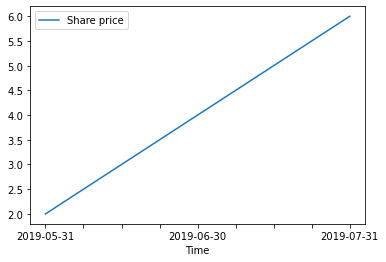

In [56]:
df.plot(x='Time', y='Share price')

In [61]:
df.loc[df.['Share price'].idxmin(), df['Date']]

SyntaxError: invalid syntax (Temp/ipykernel_26056/1217131122.py, line 1)

In [64]:
df.loc[df.['Share price'].idxmax(), df['Date']]

SyntaxError: invalid syntax (Temp/ipykernel_26056/1949270067.py, line 1)